<a href="https://colab.research.google.com/github/fannisanurhaffifi/UAS-NLP-TextClassification-/blob/main/PREDIKSI_JUDUL_SUBJECT_PT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MENGGABUNGKAN DUA FILE

In [ ]:
# 1. Import pustaka
import pandas as pd

# 2. Upload dua file CSV
from google.colab import files
print("Silakan unggah dua file CSV (misal: data1.csv dan data2.csv)...")
uploaded = files.upload()

# 3. Baca kedua file
df1 = pd.read_csv(list(uploaded.keys())[0])  # file pertama
df2 = pd.read_csv(list(uploaded.keys())[1])  # file kedua

# 4. Tampilkan info ringkas
print("\nKolom df1:", df1.columns.tolist())
print("Kolom df2:", df2.columns.tolist())

# 5. Gabungkan berdasarkan kolom 'eprintid'
df_gabung = pd.merge(df1, df2, on='eprintid', how='inner')  # inner join, bisa diganti outer/left/right

# 6. Simpan hasil gabungan
df_gabung.to_csv('hasil_gabungan.csv', index=False)

# 7. Tampilkan beberapa baris hasil
print("\nHasil Gabungan (5 Baris Pertama):")
print(df_gabung.head())


Silakan unggah dua file CSV (misal: data1.csv dan data2.csv)...


Saving eprint.csv to eprint.csv
Saving eprint_subjects.csv to eprint_subjects.csv


/tmp/ipython-input-1-593173310.py:10: DtypeWarning: Columns (43,44,52,54,58,60,61,62,63,70,71,72,73,74,75,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(list(uploaded.keys())[0])  # file pertama



Kolom df1: ['eprintid', 'rev_number', 'eprint_status', 'userid', 'importid', 'source', 'dir', 'datestamp_year', 'datestamp_month', 'datestamp_day', 'datestamp_hour', 'datestamp_minute', 'datestamp_second', 'lastmod_year', 'lastmod_month', 'lastmod_day', 'lastmod_hour', 'lastmod_minute', 'lastmod_second', 'status_changed_year', 'status_changed_month', 'status_changed_day', 'status_changed_hour', 'status_changed_minute', 'status_changed_second', 'type', 'succeeds', 'commentary', 'metadata_visibility', 'contact_email', 'fileinfo', 'latitude', 'longitude', 'item_issues_count', 'sword_depositor', 'sword_slug', 'edit_lock_user', 'edit_lock_since', 'edit_lock_until', 'title', 'ispublished', 'full_text_status', 'monograph_type', 'pres_type', 'keywords', 'note', 'suggestions', 'abstract', 'date_year', 'date_month', 'date_day', 'date_type', 'series', 'publication', 'volume', 'number', 'publisher', 'place_of_pub', 'pagerange', 'pages', 'event_title', 'event_location', 'event_dates', 'event_type'

DOWNLOAD FILE HASIL GABUNGAN

In [ ]:
from google.colab import files

# Unduh file hasil gabungan
files.download('hasil_gabungan.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MENAMPILKAN FILE YANG SUDAH DIGABUNGKAN SEBELUMNYA

In [ ]:
import pandas as pd

# Baca file CSV (pastikan file sudah ada di direktori)
df = pd.read_csv('hasil_gabungan.csv')

# Tampilkan 10 baris pertama
print("10 Contoh Data Pertama dari hasil_gabungan.csv:")
print(df.head(10))


10 Contoh Data Pertama dari hasil_gabungan.csv:
   eprintid  rev_number eprint_status  userid  importid  source  \
0         4         8.0       archive     4.0       NaN     NaN   
1         4         8.0       archive     4.0       NaN     NaN   
2         8        26.0       archive     6.0       NaN     NaN   
3         9        26.0       archive     5.0       NaN     NaN   
4         9        26.0       archive     5.0       NaN     NaN   
5        10        24.0       archive     6.0       NaN     NaN   
6        11        29.0       archive     6.0       NaN     NaN   
7        12        23.0       archive     6.0       NaN     NaN   
8        13        21.0       archive     6.0       NaN     NaN   
9        14        23.0       archive     6.0       NaN     NaN   

                 dir  datestamp_year  datestamp_month  datestamp_day  ...  \
0  disk0/00/00/00/04          2014.0              1.0            2.0  ...   
1  disk0/00/00/00/04          2014.0              1.0       

/tmp/ipython-input-3-911737235.py:4: DtypeWarning: Columns (43,44,52,54,58,60,61,62,63,70,71,72,74,75,77,78,92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('hasil_gabungan.csv')


  MENGGUNAKAN FILE HASIL GABUNGAN

In [ ]:
from google.colab import files
print("Silakan unggah file CSV...")
uploaded = files.upload()

Silakan unggah file CSV...


Saving hasil_gabungan.csv to hasil_gabungan (2).csv


MENGHAPUS KOLOM YANG TIDAK PENTING HANYA MENGGUNAKAN 3 KOLOM YANG PENTING

In [ ]:
import pandas as pd
import re

# 1. Baca file gabungan
df = pd.read_csv('hasil_gabungan.csv')

# 2. Sisakan hanya kolom penting
kolom_dipertahankan = ['eprintid', 'title', 'subjects']
df = df[kolom_dipertahankan]

# 8. Simpan hasil ke file baru
df.to_csv('data_bersih.csv', index=False)


/tmp/ipython-input-20-1242981986.py:5: DtypeWarning: Columns (43,44,52,54,58,60,61,62,63,70,71,72,74,75,77,78,92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('hasil_gabungan.csv')


MENGHAPUS DATA KOSONG PADA KOLOM YANG AKAN DIGUNAKAN

In [ ]:
# 1. Baca file gabungan
df = pd.read_csv('data_bersih.csv')

# 3. Hapus kolom kosong (jika ada kolom lain yang kosong total)
df = df.dropna(axis=1, how='all')

# 4. Hapus baris yang mengandung NaN pada kolom penting
df = df.dropna(subset=['eprintid', 'title', 'subjects'])

# 8. Simpan hasil ke file baru
df.to_csv('data_bersih_2.csv', index=False)

# 9. Tampilkan hasil akhir
print("✅ 10 contoh data setelah dibersihkan:")
print(df.head(10))


✅ 10 contoh data setelah dibersihkan:
   eprintid                                              title subjects
0         4  Praktik Manajemen CSR (tanggung jawab sosial p...       HD
1         4  Praktik Manajemen CSR (tanggung jawab sosial p...     HD28
2         8   \r\nOPTIMASI ALIRAN DAYA MENGGUNAKAN UNIFIED ...   ZA4050
3         9  KETAHANAN KULTIVAR CABAI MERAH (Capsicum annuu...       Q1
4         9  KETAHANAN KULTIVAR CABAI MERAH (Capsicum annuu...    QH301
5        10  STUDI DAYA DUKUNG TANAH ORGANIK  MENGGUNAKAN M...   ZA4050
6        11  PERANCANGAN DAN IMPLEMENTASI SISTEM INFORMASI ...   ZA4050
7        12  RANCANG BANGUN KONVEYOR PENYORTIRAN BARANG DEN...   ZA4050
8        13  RANCANG BANGUN PENGATURAN PAKAN PADA MODEL TAM...   ZA4050
9        14  RANCANG BANGUN SISTEM PAKAR UNTUK MENDIAGNOSA ...       Q1


MENGHAPUS DATA DUPLICATE PADA KOLOM TITLE DAN EPRINTID

In [ ]:
# 1. Baca file gabungan
df = pd.read_csv('data_bersih_2.csv')

# 2. Hapus duplikat berdasarkan kolom 'eprintid' dan 'title'
df = df.drop_duplicates(subset=['eprintid', 'title'])

# 3. Reset index
df = df.reset_index(drop=True)

# 4. Simpan hasil ke file baru (opsional)
df.to_csv('data_bersih_3.csv', index=False)

# 5. Tampilkan 10 data pertama
print("✅ 10 contoh data setelah duplikat dihapus:")
print(df.head(10))

✅ 10 contoh data setelah duplikat dihapus:
   eprintid                                              title subjects
0         4  Praktik Manajemen CSR (tanggung jawab sosial p...       HD
1         8   \r\nOPTIMASI ALIRAN DAYA MENGGUNAKAN UNIFIED ...   ZA4050
2         9  KETAHANAN KULTIVAR CABAI MERAH (Capsicum annuu...       Q1
3        10  STUDI DAYA DUKUNG TANAH ORGANIK  MENGGUNAKAN M...   ZA4050
4        11  PERANCANGAN DAN IMPLEMENTASI SISTEM INFORMASI ...   ZA4050
5        12  RANCANG BANGUN KONVEYOR PENYORTIRAN BARANG DEN...   ZA4050
6        13  RANCANG BANGUN PENGATURAN PAKAN PADA MODEL TAM...   ZA4050
7        14  RANCANG BANGUN SISTEM PAKAR UNTUK MENDIAGNOSA ...       Q1
8        15  ANALISA PENTANAHAN NETRAL PADA GARDU INDUK 150...   ZA4050
9        16  RANCANG BANGUN SIMULATOR ALAT BANTU KESELAMATA...   ZA4050


MENAMPILKAN ISI KOLOM SUBJECTS

In [ ]:
import pandas as pd

# 1. Baca file CSV
df = pd.read_csv('data_bersih_3.csv')

# 2. Tampilkan seluruh isi kolom 'subjects'
print("📋 Isi kolom 'subjects':")
print(df['subjects'])


📋 Isi kolom 'subjects':
0            HD
1        ZA4050
2            Q1
3        ZA4050
4        ZA4050
          ...  
51783       600
51784       370
51785       300
51786       630
51787       630
Name: subjects, Length: 51788, dtype: object


MENGKELOMPOKKAN SUBJECT MENJADI RATUSAN

In [ ]:
import pandas as pd

# 1. Baca file
df = pd.read_csv('data_bersih_3.csv')

# 2. Definisikan fungsi yang memproses subjects ke ratusan
def bersihkan_dan_kelompokkan_subjects(df, kolom='subjects'):
    # Hapus baris jika kolom bukan angka murni
    df = df[df[kolom].astype(str).str.fullmatch(r'\d+')]
    # Ubah ke integer
    df[kolom] = df[kolom].astype(int)
    # Kelompokkan ke ratusan dan simpan kembali di kolom yang sama
    df[kolom] = (df[kolom] // 100) * 100
    return df

# 3. Terapkan fungsi
df = bersihkan_dan_kelompokkan_subjects(df)

# 4. Tampilkan hasil
print("📊 Contoh hasil kolom 'subjects' yang telah dikelompokkan:")
print(df['subjects'].head(10))

# 5. Simpan ke file baru (opsional)
df.to_csv('data_bersih_4.csv', index=False)


📊 Contoh hasil kolom 'subjects' yang telah dikelompokkan:
6573     600
9184     300
9185     300
9186     300
10724    300
10725    300
10726    300
11599    300
11896    300
12527    300
Name: subjects, dtype: int64


/tmp/ipython-input-32-3098438420.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[kolom] = df[kolom].astype(int)
/tmp/ipython-input-32-3098438420.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[kolom] = (df[kolom] // 100) * 100


MENAMPILKAN ISI DARI DATSET YANG SUDAH CLEANING

In [ ]:
import pandas as pd

# 1. Baca file CSV
df = pd.read_csv('data_bersih_4.csv')

# 2. Tampilkan seluruh isi
print(df.head(10))


   eprintid                                              title  subjects
0      8282  PERAN GABUNGA KELOMPOK TANI (GAPOKTAN) BAKTI M...       600
1     11260  ANALYS QUALITY CONTROL PRODUCT AT LIMITED PART...       300
2     11261  THE ROLE OF INTERPERSONAL COMMUNICATION IN THE...       300
3     11262  STRATEGI PENGEMBANGAN USAHA BUDIDAYA IKAN LELE...       300
4     13033  FRAMING ANALYSE ABOUT TRAFFICKING IN JAMILA DA...       300
5     13034  PENGARUH GENDER TERHADAP POLA ADOPSI INTERNET ...       300
6     13035  INFLUENCE OF DISPLAY COMMEMORATION OF USAGE IN...       300
7     14036  PENGARUH LAMA PENYIMPANAN TERHADAP DAYA INFEKS...       300
8     14397  UPAYA MENINGKATKAN AKTIVITAS DAN HASIL BELAJAR...       300
9     15113  ANALISIS INDUSTRI MEBEL DI DESA KRESNO WIDODO\...       300


MELAKUKAN PROSES CLEANING LEBIH DALAM AGAR DATASET SIAP DIOLAH

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# 1. Unduh stopword
nltk.download('stopwords')

# 2. Gabungkan stopword Indonesia dan Inggris
stop_words_id = set(stopwords.words('indonesian'))
stop_words_en = set(stopwords.words('english'))
stop_words_combined = stop_words_id.union(stop_words_en)

# 3. Fungsi pembersih dan tokenisasi
def bersihkan_token_multibahasa(text):
    text = str(text).lower()                        # huruf kecil
    text = re.sub(r'\d+', '', text)                 # hapus angka
    text = re.sub(r'[^\w\s]', '', text)             # hapus tanda baca
    tokens = text.split()                           # split manual (tanpa word_tokenize)
    tokens = [t for t in tokens if t not in stop_words_combined]  # hapus stopword
    return tokens

# 4. Baca file CSV
df = pd.read_csv('data_bersih_4.csv')

# 5. Terapkan fungsi ke kolom 'title'
df['title_tokens'] = df['title'].apply(bersihkan_token_multibahasa)

# 6. Gabungkan kembali token menjadi teks bersih
df['title_clean'] = df['title_tokens'].apply(lambda x: ' '.join(x))

# 7. Tampilkan hasil
print("📌 Contoh hasil tokenisasi dan penghapusan stopword:")
print(df[['title', 'title_clean']].head(10))

# 8. Simpan ke file baru
df.to_csv('data_bersih_5.csv', index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


📌 Contoh hasil tokenisasi dan penghapusan stopword:
                                               title  \
0  PERAN GABUNGA KELOMPOK TANI (GAPOKTAN) BAKTI M...   
1  ANALYS QUALITY CONTROL PRODUCT AT LIMITED PART...   
2  THE ROLE OF INTERPERSONAL COMMUNICATION IN THE...   
3  STRATEGI PENGEMBANGAN USAHA BUDIDAYA IKAN LELE...   
4  FRAMING ANALYSE ABOUT TRAFFICKING IN JAMILA DA...   
5  PENGARUH GENDER TERHADAP POLA ADOPSI INTERNET ...   
6  INFLUENCE OF DISPLAY COMMEMORATION OF USAGE IN...   
7  PENGARUH LAMA PENYIMPANAN TERHADAP DAYA INFEKS...   
8  UPAYA MENINGKATKAN AKTIVITAS DAN HASIL BELAJAR...   
9  ANALISIS INDUSTRI MEBEL DI DESA KRESNO WIDODO\...   

                                         title_clean  
0  peran gabunga kelompok tani gapoktan bakti mak...  
1  analys quality control product limited partner...  
2  role interpersonal communication sarapan berja...  
3     strategi pengembangan usaha budidaya ikan lele  
4  framing analyse trafficking jamila sang presid...  
5

MENAMPILKAN ISI DATASET YANG SUDAH DILAKUKAN PROSES CLEANING FINAL

In [ ]:
import pandas as pd
from tabulate import tabulate  # jika belum terpasang, jalankan: !pip install tabulate

# 1. Baca file CSV
df = pd.read_csv('data_bersih_5.csv')

# 2. Tampilkan 10 baris pertama dengan format tabel yang rapi
print(tabulate(df.head(10), headers='keys', tablefmt='fancy_grid', showindex=False))


╒════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│   eprintid │ title                                                                                                                                                                                      │   subjects │ title_tokens                                                                                                                                                                                        

MENAMPILKAN VISUALISASI WORDCLOUD

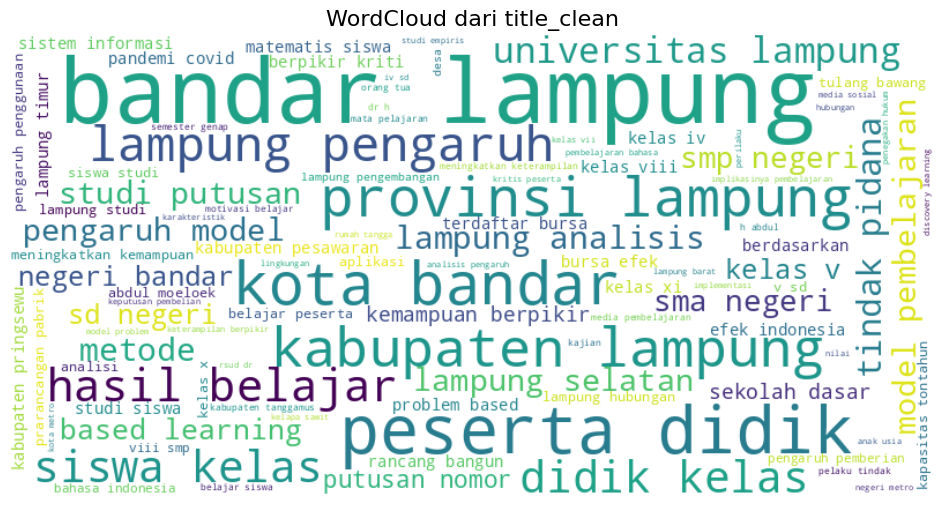

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Baca file yang sudah dibersihkan
df = pd.read_csv('data_bersih_5.csv')

# 2. Gabungkan semua teks dalam kolom 'title_clean' menjadi satu string
all_text = ' '.join(df['title_clean'].dropna())

# 3. Buat objek WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='viridis'
).generate(all_text)

# 4. Tampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud dari title_clean", fontsize=16)
plt.show()


MENAMPILKAN VISUALISASI SEBARAN DATA

📊 Jumlah data per kelas (subjects):
subjects
0       1628
100      159
200       20
300    11130
400      268
500     2749
600     5595
700      130
800        6
900      113
Name: count, dtype: int64


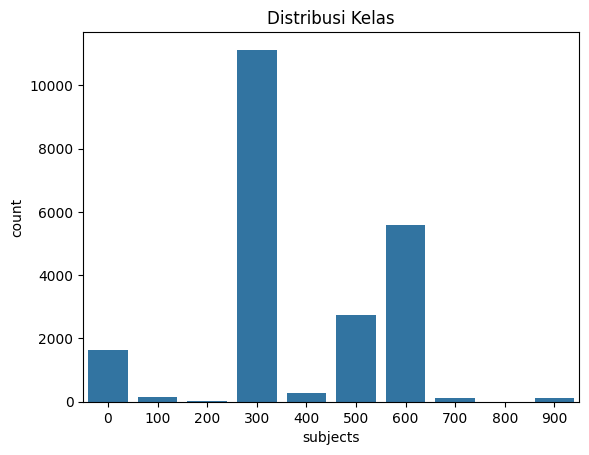

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

jumlah_per_kelas = df['subjects'].value_counts().sort_index()
print("📊 Jumlah data per kelas (subjects):")
print(jumlah_per_kelas)

df = pd.read_csv('data_bersih_5.csv')
sns.countplot(x=df['subjects'])
plt.title("Distribusi Kelas")
plt.show()


MELAKUKAN PROSES EVALUASI MENGGUNAKAN LOGISTIC REGRESSION

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Baca data
df = pd.read_csv('data_bersih_5.csv')

# 2. Drop NaN dan pastikan kolom teks
df = df.dropna(subset=['title_clean', 'subjects'])
df['title_clean'] = df['title_clean'].astype(str)

# 3. Encode label (subject_group)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['subjects'])

# 4. TF-IDF vektorisasi
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['title_clean'])

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, df['label'], test_size=0.2, random_state=42
)

# 6. Model Logistic Regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

MELAKUKAN PROSES EVALUASI DARI MODEL YANG SUDAH DILATIH


📋 Classification Report (TF-IDF + Logistic Regression):
              precision    recall  f1-score   support

           0       0.66      0.25      0.36       308
         100       0.67      0.06      0.11        32
         200       0.00      0.00      0.00         2
         300       0.82      0.96      0.89      2218
         400       0.62      0.21      0.31        38
         500       0.74      0.50      0.60       582
         600       0.74      0.80      0.77      1132
         700       0.00      0.00      0.00        23
         800       0.00      0.00      0.00         0
         900       0.00      0.00      0.00        25

    accuracy                           0.79      4360
   macro avg       0.42      0.28      0.30      4360
weighted avg       0.77      0.79      0.76      4360



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


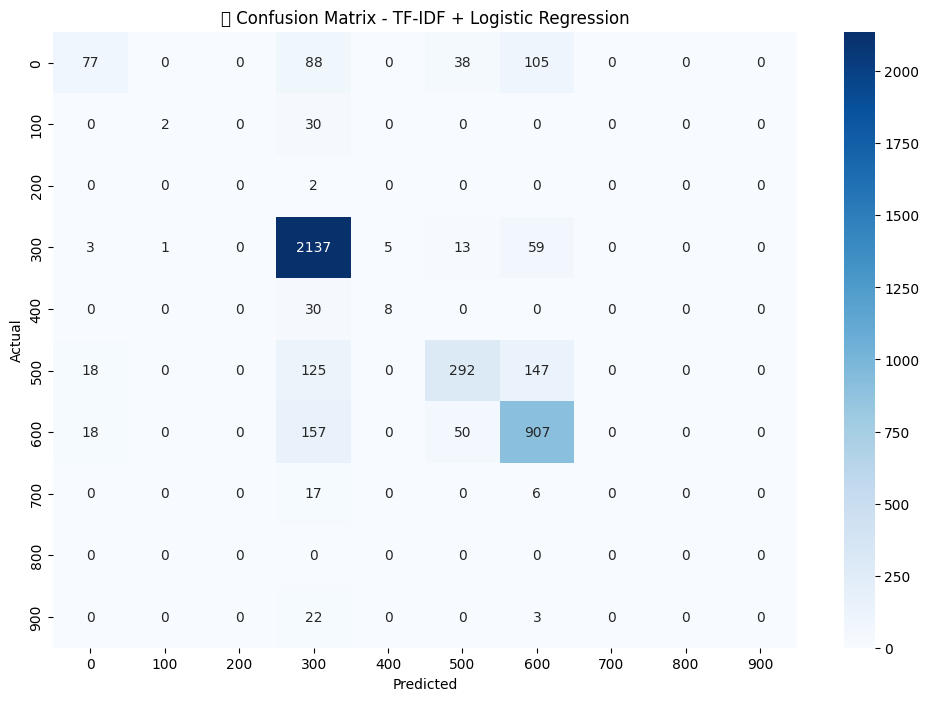

In [ ]:
# 7. Evaluasi
y_pred = clf.predict(X_test)

# 8. Report dan Confusion Matrix
all_labels = label_encoder.transform(label_encoder.classes_)

print("\n📋 Classification Report (TF-IDF + Logistic Regression):")
print(classification_report(
    y_test,
    y_pred,
    labels=all_labels,
    target_names=label_encoder.classes_.astype(str),
    zero_division=0
))

# 9. Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=all_labels)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_.astype(str),
            yticklabels=label_encoder.classes_.astype(str))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Confusion Matrix - TF-IDF + Logistic Regression")
plt.show()

In [ ]:
# === 1. Import library ===
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
import ipywidgets as widgets

# === 2. Baca dan siapkan data ===
df = pd.read_csv('data_bersih_5.csv')
df = df.dropna(subset=['title_clean', 'subjects'])
df['title_clean'] = df['title_clean'].astype(str)

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['subjects'])

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['title_clean'])
y = df['label']

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# === 3. Definisikan fungsi prediksi ===
def bersihkan_judul(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

def prediksi_kategori_judul(judul_input):
    judul_bersih = bersihkan_judul(judul_input)
    vektor_input = vectorizer.transform([judul_bersih])
    pred_label = model.predict(vektor_input)[0]
    kelas_asli = label_encoder.inverse_transform([pred_label])[0]
    return kelas_asli



KOLOM PREDIKSI JUDUL TERHADAP SUBJECT

In [ ]:
# === 4. Antarmuka interaktif ===
input_box = widgets.Text(description='Judul:', placeholder='Masukkan judul buku')
button = widgets.Button(description="Prediksi")

def on_predict_clicked(b):
    judul = input_box.value
    hasil = prediksi_kategori_judul(judul)
    print(f"📘 Judul: {judul}")
    print(f"📌 Prediksi kategori: {hasil}")

button.on_click(on_predict_clicked)
display(input_box, button)

Text(value='', description='Judul:', placeholder='Masukkan judul buku')

Button(description='Prediksi', style=ButtonStyle())

📘 Judul: prediksi arya lulus
📌 Prediksi kategori: 600
📘 Judul: prediksi pipilulus
📌 Prediksi kategori: 600
📘 Judul: rembulan terbenam
📌 Prediksi kategori: 300
📘 Judul: sentiment analysis
📌 Prediksi kategori: 600
